In [68]:
#import thinkplot
#import thinkstats2
import pandas as pd
import numpy as np
import math
import scipy.stats as ss
import thinkplot
import thinkstats2
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import linear_model

##Seaborn for fancy plots. 
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (15,5)

# Assignment 3 - Basic Predictions and Regression

## Questions

### Part 1 - Election Prediction

Suppose you are looking at an election in a fictional province. There are 7 total elctoral districts, and the winner in each district is determined by a first-past-the-post system (what we have in Canada - the most votes wins, regardless of share). There are two parties - the Purples and the Yellows. Whoever controls the most seats will be the ruling party - so in our 2 party scenario, the party who wins 4 or more of the districts will govern. There is an election every year, they love voting. 

Recent polling indicating the expected vote share in each district is shown in the "dist_polls" table below. These values are a composite of several polls that the experts have combined and weighted. The "Purple" values show the expected vote share of the Purple party, along with the variance of that expectation and the number of polls that were combined to get that result.  

As well, research has shown that the vote distribution is impacted by voter turnout. In general, the more people vote, the more the vote split shifts towards the Yellow party. We have data on past elections and the results, we expect that the turnout will be in line with the past elections - or more specifically, we have no reason to expect it to differ. This impact is measured in the table in code below - that table shows the voter turnout, in a percentage, as well as the change in the Yellow party's vote share (also in percentage) as compared to the polling averages. For example, if one row showed "52" and ".8", that would mean that voter turnout was 52%, and the Yellow party got .8% higher of a vote share than the polling showed. 

<b>What is the probability that the Purple Party controls the government after the election?</b>

<b>Note:</b> the errors and confidence intervals are not totally trivial. As part of the written answer, offer an evaluation of your confidence in the prediction, and why you think that. This is not a question with one specific error, your estimation will have some expected errors, somewhere. You may not have the tools to calculate it all the way through, that's fine. 

### Question 1 - Your Answer in English

Please fill in (and extend if required) the list here to explain what you did. There are multiple reasonable things you could do to approach this, so please note what you did here. For most people I assume this will be about 3-5 statements - you don't need to explain the internals of things we covered (e.g. if there's a hypothesis test, you don't need to explain how that works), just how you structured your approach to the problem. 

<ul>
<li>
<li>
<li>
<li> <b> What do you think about the error/accuracy:</b>
</ul>

##### Setup Poll Data

The dataframe "dist_polls" contains all of the polls for each seat. Each value is expressed as expected vote share (as a ratio) for the <b>Purple</b> party. The Yellow party can be safely assumed to get the rest of the votes. 

In [69]:
# Please don't edit this part. 
# Setup polling data. 
districts = [1,2,3,4,5,6,7]
dist_polls = pd.DataFrame(districts, columns={"district"})

dist_polls["Poll_1"] = [.55, .49, .51, .6, .41, .46, .54]
dist_polls["Poll_2"] = [.53, .51, .51, .62, .44, .48, .53]
dist_polls["Poll_3"] = [.51, .49, .53, .61, .42, .46, .52]
dist_polls["Poll_4"] = [.47, .48, .51, .54, .45, .45, .51]
dist_polls["Poll_5"] = [.61, .52, .49, .73, .44, .51, .53]
dist_polls["Poll_6"] = [.54, .45, .51, .61, .47, .52, .52]
dist_polls["Poll_7"] = [.55, .47, .5, .56, .47, .46, .56]
dist_polls["Poll_8"] = [.53, .49, .51, .55, .43, .49, .55]
dist_polls["Poll_9"] = [.57, .39, .52, .57, .53, .43, .53]


dist_polls

,district,Poll_1,Poll_2,Poll_3,Poll_4,Poll_5,Poll_6,Poll_7,Poll_8,Poll_9
0,1,0.55,0.53,0.51,0.47,0.61,0.54,0.55,0.53,0.57
1,2,0.49,0.51,0.49,0.48,0.52,0.45,0.47,0.49,0.39
2,3,0.51,0.51,0.53,0.51,0.49,0.51,0.50,0.51,0.52
3,4,0.60,0.62,0.61,0.54,0.73,0.61,0.56,0.55,0.57
4,5,0.41,0.44,0.42,0.45,0.44,0.47,0.47,0.43,0.53
5,6,0.46,0.48,0.46,0.45,0.51,0.52,0.46,0.49,0.43
6,7,0.54,0.53,0.52,0.51,0.53,0.52,0.56,0.55,0.53


##### Setup Turnout Data

The dataframe "past_vte_table" shows the voter turnout, along with the impact on the votes counted for the <b>Yellow party</b>, all expressed as percentages. For example, if in one row the turnout is .45 and the Yellow_improvement is -.04, that means that 45% of the populace turned out to vote, and the Yellow party got 4% fewer votes than polling indicated. 

In [70]:
# Please don't edit this part. 
# Setup vote data. 
voter_turnout_history = [.53, .51, .48, .55, .54, .59, .49, .57, .56]
past_vote_table = pd.DataFrame(voter_turnout_history, columns={"voter_turn_percentage"})
past_vote_table["Yellow_improvement"] = [.012, .023, -.017, .031, .030, -.004, -.03, .042, .029]
past_vote_table["year"] = [2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021]
past_vote_table

,voter_turn_percentage,Yellow_improvement,year
0,0.53,0.012,2013
1,0.51,0.023,2014
2,0.48,-0.017,2015
3,0.55,0.031,2016
4,0.54,0.030,2017
5,0.59,-0.004,2018
6,0.49,-0.030,2019
7,0.57,0.042,2020
8,0.56,0.029,2021


## Start Your Work

### Part 1 - Election

In [71]:
#Simulate one district 
np.random.uniform(low=dist_polls["Poll_1"].min(),high=dist_polls["Poll_1"].max(),size=9) #The range is from the max and min vale of each district from the polling data


array([0.46456585, 0.50447064, 0.54825456, 0.57900701, 0.57376369,
       0.57572583, 0.54880713, 0.50285186, 0.54551478])

In [72]:
def SimGame(low,high,n):
    p=np.random.uniform(low=low,high=high,size=n)
    return p

In [73]:
#Simulate many times:
def estimatevote(low,high,m=1000):
    estimates = []
    num=0
    for i in range(m):
        p1=SimGame(low,high,n=1)
        if p1>0.5:
            num=num+1
    return num

In [75]:
#create an analytical distribution:
def anadist(data,n):
    mu=data.mean()
    sigma=data.std()
    r1 = np.random.normal(mu, sigma, n)
    return r1

In [83]:
#district1:
data1=anadist(dist_polls["Poll_1"],n=100)
print('district1', estimatevote(low=data1.min(),high=data1.max(),m=1000))

#district2:
data2=anadist(dist_polls["Poll_2"],n=100)
print('district2', estimatevote(low=data2.min(),high=data2.max(),m=1000))

#district3:
data3=anadist(dist_polls["Poll_3"],n=100)
print('district3', estimatevote(low=data3.min(),high=data3.max(),m=1000))

#district4:
data4=anadist(dist_polls["Poll_4"],n=100)
print('district4', estimatevote(low=data4.min(),high=data4.max(),m=1000))

#district5:
data5=anadist(dist_polls["Poll_5"],n=100)
print('district5', estimatevote(low=data5.min(),high=data5.max(),m=1000))

#district6:
data6=anadist(dist_polls["Poll_6"],n=100)
print('district6', estimatevote(low=data6.min(),high=data6.max(),m=1000))

#district7:
data7=anadist(dist_polls["Poll_7"],n=100)
print('district7', estimatevote(low=data7.min(),high=data7.max(),m=1000))

district1 505
district2 609
district3 438
district4 372
district5 595
district6 561
district7 466


#### Based on the above calculations, the probability of purple government control the government is 0.571

### Part 2 - Regression

<b>Use the data provided to try to predict the wage. </b>

The data is from FIFA rankings for players. You don't need to know anything about soccer or video games for this, so if these values are meaningless to you, just treat them as numbers and you'll be fine. All of the features are rankings are evaluations of how good different soccar players are at different skills.

#### Answer in English

Please fill in (and extend if required) the list here to explain what you did. There are multiple reasonable things you could do to approach this, so please note what you did here. For most people I assume this will be about 3-5 statements - you don't need to explain the internals of things we covered (e.g. if there's a hypothesis test, you don't need to explain how that works), just how you structured your approach to the problem. 

<ul>
<li>
<li>
<li>
</ul>

In [85]:
df = pd.read_csv("players_20_2.csv")
df.head()

,wage_eur,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,...,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle
0,565000,88,95,70,92,88,97,93,94,92,...,94,48,40,94,94,75,96,33,37,26
1,405000,84,94,89,83,87,89,81,76,77,...,93,63,29,95,82,85,95,28,32,24
2,290000,87,87,62,87,87,96,88,87,81,...,84,51,36,87,90,90,94,27,26,29
3,125000,13,11,15,43,13,12,13,14,40,...,12,34,19,11,65,11,68,27,12,18
4,470000,81,84,61,89,83,95,83,79,83,...,80,54,41,87,89,88,91,34,27,22


In [86]:
#Find correlations
cor_matrix=df.corr().abs()
print(cor_matrix)

                            wage_eur  attacking_crossing  attacking_finishing  \
wage_eur                    1.000000            0.236022             0.221029   
attacking_crossing          0.236022            1.000000             0.669081   
attacking_finishing         0.221029            0.669081             1.000000   
attacking_heading_accuracy  0.191575            0.476990             0.487541   
attacking_short_passing     0.302734            0.810796             0.673158   
attacking_volleys           0.260308            0.695453             0.891961   
skill_dribbling             0.237614            0.864329             0.829514   
skill_curve                 0.263147            0.837687             0.771683   
skill_fk_accuracy           0.235657            0.763377             0.707490   
skill_long_passing          0.288948            0.752596             0.525896   
skill_ball_control          0.278771            0.846172             0.795601   
movement_acceleration       

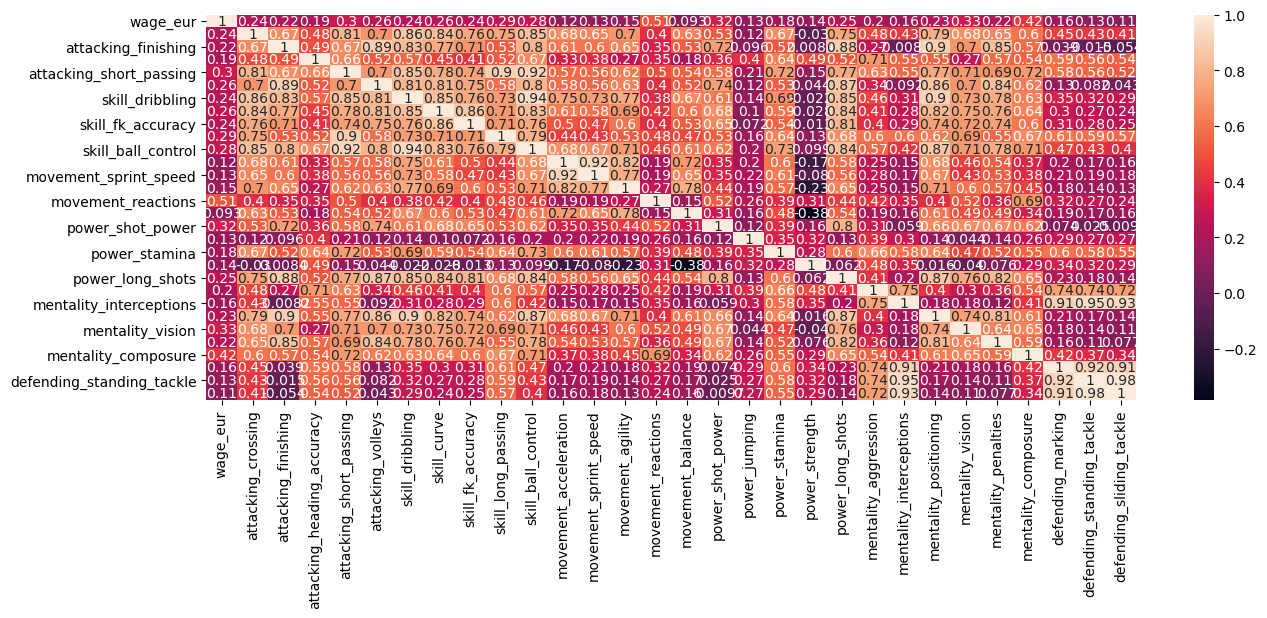

In [87]:
#Visual correlation and distributions
corr_matrix=df.corr()
sns.heatmap(corr_matrix,annot=True)
plt.show()

In [88]:
# Find columns that need to be droped
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
print(upper_tri)

                            wage_eur  attacking_crossing  attacking_finishing  \
wage_eur                         NaN            0.236022             0.221029   
attacking_crossing               NaN                 NaN             0.669081   
attacking_finishing              NaN                 NaN                  NaN   
attacking_heading_accuracy       NaN                 NaN                  NaN   
attacking_short_passing          NaN                 NaN                  NaN   
attacking_volleys                NaN                 NaN                  NaN   
skill_dribbling                  NaN                 NaN                  NaN   
skill_curve                      NaN                 NaN                  NaN   
skill_fk_accuracy                NaN                 NaN                  NaN   
skill_long_passing               NaN                 NaN                  NaN   
skill_ball_control               NaN                 NaN                  NaN   
movement_acceleration       

In [89]:
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.95)]
print(); print(to_drop)


['defending_sliding_tackle']


In [90]:
df_ = df.drop(columns={"defending_sliding_tackle",'wage_eur'})
df_.head()

,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,...,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle
0,88,95,70,92,88,97,93,94,92,96,...,68,94,48,40,94,94,75,96,33,37
1,84,94,89,83,87,89,81,76,77,92,...,78,93,63,29,95,82,85,95,28,32
2,87,87,62,87,87,96,88,87,81,95,...,49,84,51,36,87,90,90,94,27,26
3,13,11,15,43,13,12,13,14,40,30,...,78,12,34,19,11,65,11,68,27,12
4,81,84,61,89,83,95,83,79,83,94,...,63,80,54,41,87,89,88,91,34,27


In [91]:
df.columns

Index(['wage_eur', 'attacking_crossing', 'attacking_finishing',
       'attacking_heading_accuracy', 'attacking_short_passing',
       'attacking_volleys', 'skill_dribbling', 'skill_curve',
       'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
       'movement_acceleration', 'movement_sprint_speed', 'movement_agility',
       'movement_reactions', 'movement_balance', 'power_shot_power',
       'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots',
       'mentality_aggression', 'mentality_interceptions',
       'mentality_positioning', 'mentality_vision', 'mentality_penalties',
       'mentality_composure', 'defending_marking', 'defending_standing_tackle',
       'defending_sliding_tackle'],
      dtype='object')

In [92]:
#set up the data
target='wage_eur'
x= np.array(df_)
y = np.array(df["wage_eur"]).reshape(-1,1)
print("X shape", x.shape)
print("Y shape", y.shape)

X shape (18278, 28)
Y shape (18278, 1)


In [93]:
xTrain, xTest, yTrain, yTest = train_test_split(x,y,test_size=.3)

#### Split Data

In [94]:
xTrain, xTest, yTrain, yTest = train_test_split(x,y,test_size=.3)

##### Train Model

In [95]:
#Generate model 
model = LinearRegression().fit(xTrain,yTrain)

##### Check Results

In [96]:
#Get some info on our new regression model
r_sq = model.score(xTest, yTest)
print('R-squared:', r_sq)

R-squared: 0.28440383361670063


In [97]:
print('Intercept:', model.intercept_[0])
print('Coefs:', model.coef_[0])

Intercept: -67108.09153366103
Coefs: [  21.48938453   31.8194988     9.23619298   82.50206988   95.80705598
  -31.42283905   58.95991709  -69.46919549  -13.71492794  107.7624285
   29.10856853   51.81639956  -99.65454119  930.34430712  -44.10603798
  134.53583139   58.95278541  -95.29403683  -37.01573694 -169.94906143
  -70.65599188  -56.42750998  -84.54632515  143.40462071  -23.02476031
  216.98379341  -10.28810534   87.30254055]


In [98]:
#Get RMSE
tmp = model.predict(xTest)
mean_squared_error(tmp, yTest, squared=False)

17359.91230313806